# Import da Bibliotecas

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import pickle

# Carregando o Dataset

In [236]:
df = pd.read_csv('data/flood_data.csv')

In [237]:
df.head()

,location_id,latitude,longitude,flood_severity,population_density,avg_income,predominant_household_type,demand_hygiene,demand_clothing,demand_food,nearest_dist_point_id,dist_point_latitude,dist_point_longitude,distance_to_point_km,point_capacity_hygiene,point_capacity_clothing,point_capacity_food,accessibility_score
0,LOC_6468c348,-23.691534,-46.549257,2,931.52,1977.28,Casal,5,3,4,DP_e82396bc,-23.654766,-46.547772,4.08,2,7,8,6
1,LOC_4f4394b0,-23.577696,-46.514305,3,1253.15,2118.22,Casal,6,4,6,DP_d8b2af58,-23.608167,-46.539444,4.24,7,4,3,5
2,LOC_64a95ec7,-23.613025,-46.717955,2,1927.12,1954.28,Família com Crianças,2,3,5,DP_105d35a6,-23.603585,-46.702236,1.91,8,9,4,8
3,LOC_c043922c,-23.652103,-46.760923,1,927.66,500.00,Família com Crianças,3,1,2,DP_3fa9402c,-23.643582,-46.795433,3.63,7,5,6,8
4,LOC_ebb29c2a,-23.562421,-46.739868,3,4130.17,1286.86,Adulto Sozinho,7,4,1,DP_3995de33,-23.576313,-46.745390,1.64,8,2,7,7


# Análise Exploratória

## Informações Básicas

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location_id                 500 non-null    object 
 1   latitude                    500 non-null    float64
 2   longitude                   500 non-null    float64
 3   flood_severity              500 non-null    int64  
 4   population_density          500 non-null    float64
 5   avg_income                  500 non-null    float64
 6   predominant_household_type  500 non-null    object 
 7   demand_hygiene              500 non-null    int64  
 8   demand_clothing             500 non-null    int64  
 9   demand_food                 500 non-null    int64  
 10  nearest_dist_point_id       500 non-null    object 
 11  dist_point_latitude         500 non-null    float64
 12  dist_point_longitude        500 non-null    float64
 13  distance_to_point_km        500 non

## Verificação de Valores Nulos

In [239]:
df.isnull().sum()

location_id                   0
latitude                      0
longitude                     0
flood_severity                0
population_density            0
avg_income                    0
predominant_household_type    0
demand_hygiene                0
demand_clothing               0
demand_food                   0
nearest_dist_point_id         0
dist_point_latitude           0
dist_point_longitude          0
distance_to_point_km          0
point_capacity_hygiene        0
point_capacity_clothing       0
point_capacity_food           0
accessibility_score           0
dtype: int64

## Estatísticas Descritivas (Numéricas)

In [240]:
df.describe()

,latitude,longitude,flood_severity,population_density,avg_income,demand_hygiene,demand_clothing,demand_food,dist_point_latitude,dist_point_longitude,distance_to_point_km,point_capacity_hygiene,point_capacity_clothing,point_capacity_food,accessibility_score
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,-23.547899,-46.648895,2.576000,1435.48026,2702.145880,4.942000,4.930000,4.638000,-23.545560,-46.649489,2.301440,5.100000,5.938000,5.490000,6.320000
std,0.084196,0.085611,0.941274,1344.33632,1827.402588,2.024558,2.482221,2.416326,0.077688,0.084028,1.291408,2.859082,2.780219,2.967746,1.764036
min,-23.699525,-46.799895,1.000000,130.33000,500.000000,1.000000,1.000000,1.000000,-23.692287,-46.799220,0.080000,1.000000,1.000000,1.000000,1.000000
25%,-23.617981,-46.719023,2.000000,592.63750,1296.952500,3.000000,3.000000,3.000000,-23.622197,-46.714927,1.390000,3.000000,4.000000,3.000000,5.000000
50%,-23.546073,-46.652208,3.000000,1005.79000,2287.905000,5.000000,5.000000,4.000000,-23.543480,-46.653110,2.095000,4.000000,6.000000,6.000000,6.000000
75%,-23.478148,-46.573192,3.000000,1795.92500,3728.190000,6.000000,7.000000,7.000000,-23.481401,-46.579277,3.012500,8.000000,8.000000,8.000000,7.000000
max,-23.400146,-46.500463,4.000000,10102.86000,12247.360000,10.000000,10.000000,10.000000,-23.404291,-46.509874,7.620000,10.000000,10.000000,10.000000,10.000000


## Estatísticas Descritivas (Categóricas)

In [241]:
df.describe(include=['object'])

,location_id,predominant_household_type,nearest_dist_point_id
count,500,500,500
unique,500,4,50
top,LOC_6468c348,Família com Crianças,DP_92787c0a
freq,1,208,30


## Plotando Gráficos

In [242]:
colunas_numericas = df.select_dtypes(include=np.number).columns.tolist()

### Histograma para flood_severity (Severidade da Inundação)


C:\Users\guilh\AppData\Local\Temp\ipykernel_31272\2277626337.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['flood_severity'], bins=5, kde=False, palette='viridis')


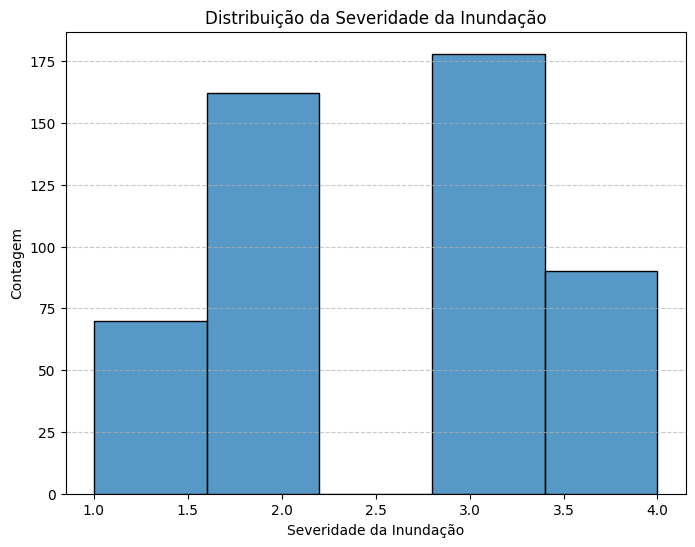

In [243]:
plt.figure(figsize=(8, 6))
sns.histplot(df['flood_severity'], bins=5, kde=False, palette='viridis')
plt.title('Distribuição da Severidade da Inundação')
plt.xlabel('Severidade da Inundação')
plt.ylabel('Contagem')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Gráfico de Dispersão: Densidade Populacional vs. Renda Média


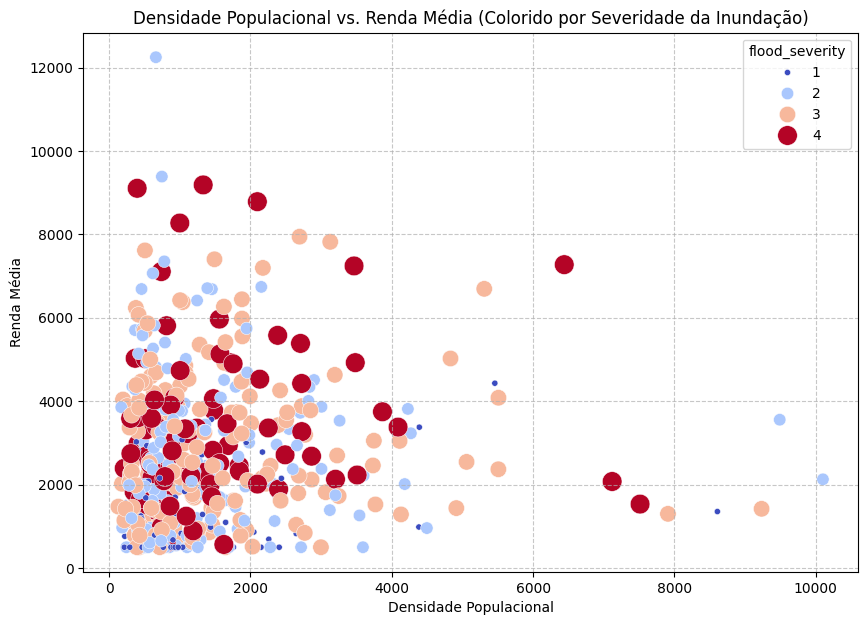

In [244]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='population_density', y='avg_income', hue='flood_severity',
                size='flood_severity', sizes=(20, 200), palette='coolwarm', data=df)
plt.title('Densidade Populacional vs. Renda Média (Colorido por Severidade da Inundação)')
plt.xlabel('Densidade Populacional')
plt.ylabel('Renda Média')
plt.grid(linestyle='--', alpha=0.7)
plt.show()

### Gráfico de Barras: Demanda Média por Tipo de Recurso


C:\Users\guilh\AppData\Local\Temp\ipykernel_31272\377172460.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=demand_avg.index, y=demand_avg.values, palette='plasma')


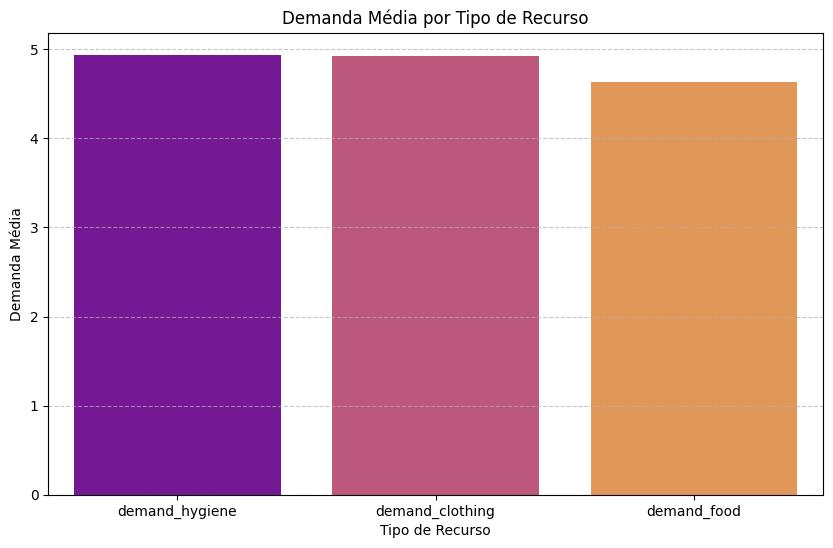

In [245]:
demand_cols = ['demand_hygiene', 'demand_clothing', 'demand_food']
demand_avg = df[demand_cols].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=demand_avg.index, y=demand_avg.values, palette='plasma')
plt.title('Demanda Média por Tipo de Recurso')
plt.xlabel('Tipo de Recurso')
plt.ylabel('Demanda Média')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Gráfico de Dispersão: Severidade da Inundação por Localização Geográfica

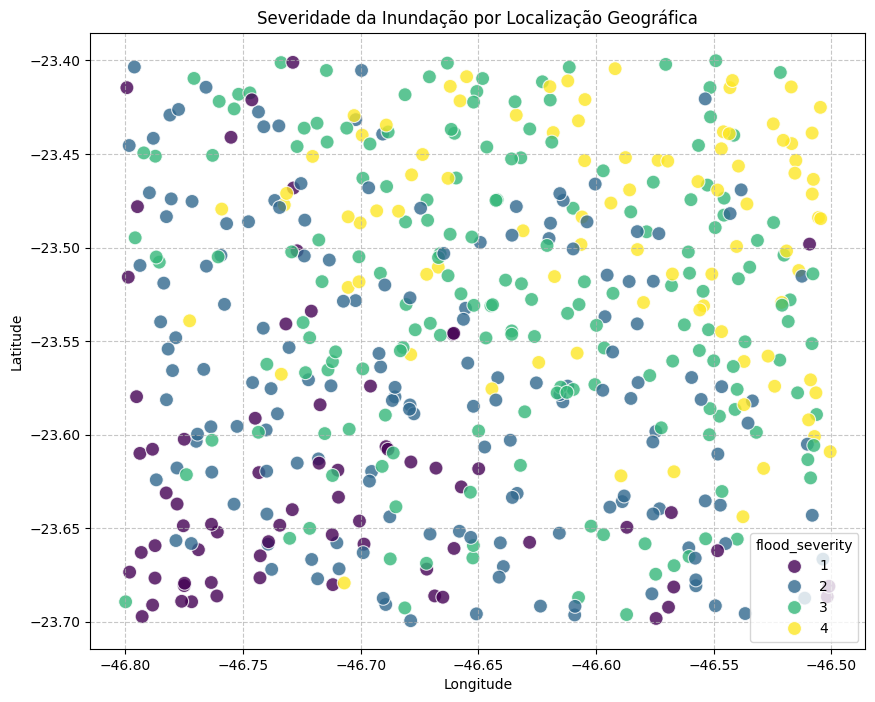

In [246]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', hue='flood_severity', palette='viridis',
                s=100, alpha=0.8, data=df)
plt.title('Severidade da Inundação por Localização Geográfica')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(linestyle='--', alpha=0.7)
plt.show()

### Mapa de Calor de Correlação entre Colunas Numéricas

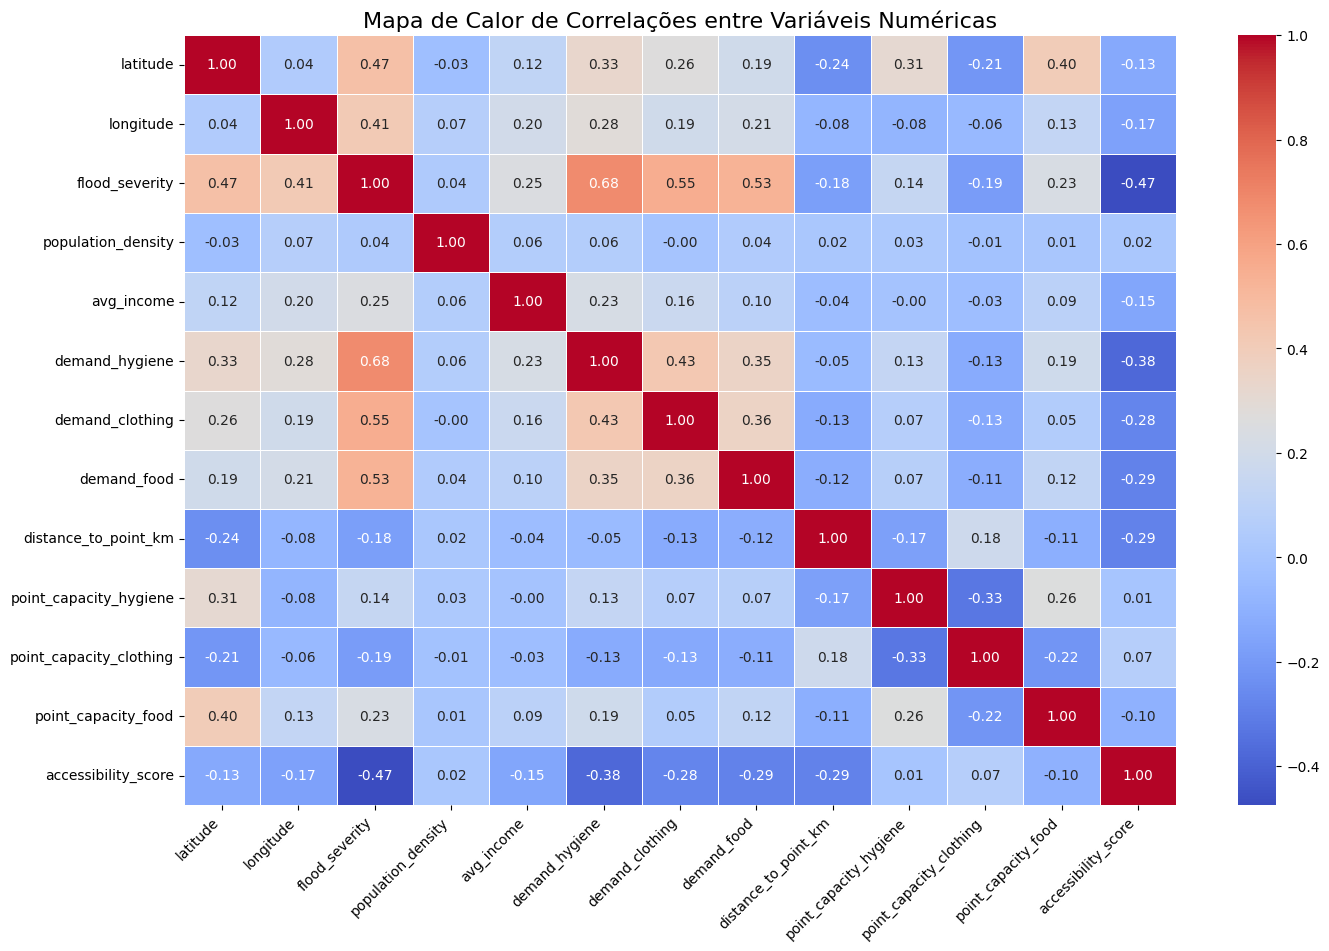

In [247]:
plt.figure(figsize=(16, 10))
corr_cols = [col for col in colunas_numericas if col not in ['dist_point_latitude', 'dist_point_longitude']]
correlation_matrix = df[corr_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Mapa de Calor de Correlações entre Variáveis Numéricas', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

# Data Preparation

Após essa análise exploratória e seguindo nossas hipóteses, decidimos que a coluna alvo será o total das demandas de higiene, roupa e comida. Para isso, precisamos criar essa nova coluna alvo que será a soma dessas três colunas.

In [248]:
df['total_demanda'] = df['demand_food'] + df['demand_hygiene'] + df['demand_clothing']

Também entendemos que para nosso caso de uso não faz sentido IDs, lat/lon, demandas individuais e capacidades do ponto (foco na previsão da demanda da localidade)

In [249]:
features = [
    'flood_severity',
    'population_density',
    'avg_income',
    'predominant_household_type',
    'distance_to_point_km',
    'accessibility_score'
]

target = 'total_demanda'

print(f"Features selecionadas: {features}")
print(f"Target selecionado: {target}")

Features selecionadas: ['flood_severity', 'population_density', 'avg_income', 'predominant_household_type', 'distance_to_point_km', 'accessibility_score']
Target selecionado: total_demanda


In [250]:
x = df[features]
y = df[target]

## Normalização das colunas numéricas

In [251]:
numeric_features = x.select_dtypes(include=np.number).columns

scaler_standard = StandardScaler()

x_numeric = scaler_standard.fit_transform(x[numeric_features])

## Encoding das colunas categóricas

In [252]:
categorical_features = x.select_dtypes(include=['object']).columns

onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

x_categorical = pd.DataFrame(
    onehot_encoder.fit_transform(x[categorical_features]),
    columns=onehot_encoder.get_feature_names_out(categorical_features)
)

## Juntando as colunas numéricas + categóricas agora processadas

In [253]:
x_processed = np.hstack([x_numeric, x_categorical])

## Dividindo em treino e teste

In [254]:
X_train, X_test, y_train, y_test = train_test_split(x_processed, y, test_size=0.2, random_state=42)

# Modeling

Decidimos escolher alguns modelos de regressão para depois avaliar o desempenho deles e escolher o melhor. Os modelos escolhidos foram:
- Regressão Linear
- Random Forest
- Decision Tree
- Xgboost

In [255]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [256]:
rfc = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rfc.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [257]:
dtc = DecisionTreeRegressor()
dtc.fit(X_train, y_train)

DecisionTreeRegressor()

In [258]:
xgboost = XGBRegressor()
xgboost.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

# Avaliação

In [259]:
modelos = [linear, rfc, dtc, xgboost]

for model in modelos:
    print(f"Modelo: {model.__class__.__name__}")

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"\n--- Resultados da Avaliação ---")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R²): {r2:.4f}")
    print("-------------------------------------------")

Modelo: LinearRegression

--- Resultados da Avaliação ---
Mean Squared Error (MSE): 9.3573
Root Mean Squared Error (RMSE): 3.0590
R-squared (R²): 0.6525
-------------------------------------------
Modelo: RandomForestRegressor

--- Resultados da Avaliação ---
Mean Squared Error (MSE): 10.7835
Root Mean Squared Error (RMSE): 3.2838
R-squared (R²): 0.5995
-------------------------------------------
Modelo: DecisionTreeRegressor

--- Resultados da Avaliação ---
Mean Squared Error (MSE): 16.3600
Root Mean Squared Error (RMSE): 4.0447
R-squared (R²): 0.3924
-------------------------------------------
Modelo: XGBRegressor

--- Resultados da Avaliação ---
Mean Squared Error (MSE): 13.0863
Root Mean Squared Error (RMSE): 3.6175
R-squared (R²): 0.5140
-------------------------------------------


## Resultado da Avaliação dos Modelos

| Modelo                   | MSE     | RMSE    | R²     |
|--------------------------|---------|---------|--------|
| **Regressão Linear**   | **9.3573** | **3.0590** | **0.6525** |
| Random Forest Regressor | 10.7835 | 3.2838 | 0.5995 |
| Decision Tree Regressor | 15.8400 | 3.9799 | 0.4117 |
| XGBoost Regressor       | 13.0863 | 3.6175 | 0.5140 |

---

**Melhor modelo:** **Regressão Linear**  
*Melhor R²* e *menor erro (MSE e RMSE)* entre os modelos testados.


## Validação Cruzada

In [260]:
lr = LinearRegression()

cv_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='r2')

print("Scores de Cross-Validation (R²):", cv_scores)
print("Média dos Scores:", cv_scores.mean())
print("Desvio Padrão dos Scores:", cv_scores.std())

Scores de Cross-Validation (R²): [0.65674113 0.70173048 0.76317248 0.64947037 0.5560136 ]
Média dos Scores: 0.6654256130955597
Desvio Padrão dos Scores: 0.06807858972786839


# Exportando o modelo para poder utilizar

In [261]:
with open('model/modelo_regressao_linear.pkl', 'wb') as f:
    pickle.dump(lr, f)
    print("modelo exportado como .pkl com sucesso!")

modelo exportado como .pkl com sucesso!
